In [68]:
import sys
print("Python version:", sys.version)

import pandas as pd
print("pandas version:", pd.__version__)

import matplotlib.pyplot as plt
print("matplotlib version:", matplotlib.__version__)

import numpy as np
print("NumPy version:", np.__version__)

import scipy as sp
print("SciPy version:", sp.__version__)

import IPython
print("IPython version:", IPython.__version__)

import sklearn
print("scikit-learn version:", sklearn.__version__)

Python version: 3.7.0 (default, Jun 28 2018, 08:04:48) [MSC v.1912 64 bit (AMD64)]
pandas version: 0.23.4
matplotlib version: 2.2.3
NumPy version: 1.15.4
SciPy version: 1.1.0
IPython version: 6.5.0
scikit-learn version: 0.19.2


In [90]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

data = pd.read_csv("conversion_data.csv")
X_train, X_test, y_train, y_test = train_test_split(data.drop(['converted'], 1), data['converted'], random_state=0)

In [91]:
data

,country,age,new_user,source,total_pages_visited,converted
0,UK,25,1,Ads,1,0
1,US,23,1,Seo,5,0
2,US,28,1,Seo,4,0
3,China,39,1,Seo,5,0
4,US,30,1,Seo,6,0
5,US,31,0,Seo,1,0
6,China,27,1,Seo,4,0
7,US,23,0,Ads,4,0
8,UK,29,0,Direct,4,0
9,US,25,0,Ads,2,0


In [92]:
data.describe()

,age,new_user,total_pages_visited,converted
count,316200.000000,316200.000000,316200.000000,316200.000000
mean,30.569858,0.685465,4.872966,0.032258
std,8.271802,0.464331,3.341104,0.176685
min,17.000000,0.000000,1.000000,0.000000
25%,24.000000,0.000000,2.000000,0.000000
50%,30.000000,1.000000,4.000000,0.000000
75%,36.000000,1.000000,7.000000,0.000000
max,123.000000,1.000000,29.000000,1.000000


In [95]:
data.corr()

,age,new_user,total_pages_visited,converted
age,1.000000,0.012343,-0.045922,-0.088797
new_user,0.012343,1.000000,-0.082541,-0.152374
total_pages_visited,-0.045922,-0.082541,1.000000,0.528994
converted,-0.088797,-0.152374,0.528994,1.000000


In [117]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression().fit(X_train.select_dtypes(['number']), y_train)

In [119]:
lr.coef_

array([[-0.0768767 , -1.67530166,  0.75540276]])

In [66]:
print(f"Training score {lr.score(X_train.select_dtypes(['number']), y_train)}")
print(f"Test score {lr.score(X_test.select_dtypes(['number']), y_test)}")

Training score 0.5007800969850306
Test score 0.9671473750790639


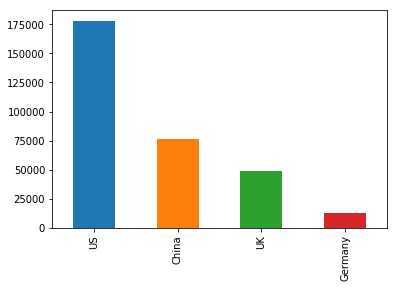

In [9]:
data['country'].value_counts().plot(kind='bar')

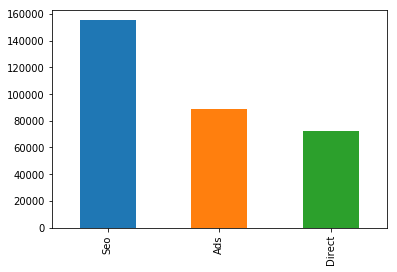

In [8]:
data['source'].value_counts().plot(kind='bar')


In [120]:
data = pd.read_csv("conversion_data.csv")

for param in ["US", "China", "UK", "Germany"]:
    data[param] = (data["country"] == param).astype(float)
    
    
for param in ["Seo", "Ads", "Direct"]:
    data[param] = (data["source"] == param).astype(float)
    
X_train, X_test, y_train, y_test = train_test_split(data.drop(["country", "source", "converted"], 1), data['converted'], random_state=0)

In [24]:
X_train.describe()

,age,new_user,total_pages_visited,US,China,UK,Germany,Seo,Ads,Direct
count,237150.000000,237150.000000,237150.000000,237150.000000,237150.000000,237150.000000,237150.000000,237150.000000,237150.000000,237150.000000
mean,30.571162,0.684904,4.870306,0.564099,0.241543,0.152958,0.041400,0.490403,0.280051,0.229547
std,8.269799,0.464555,3.338095,0.495875,0.428020,0.359948,0.199214,0.499909,0.449025,0.420542
min,17.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,24.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,30.000000,1.000000,4.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,36.000000,1.000000,7.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000
max,123.000000,1.000000,29.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [121]:
data.corr()["converted"]

age                   -0.088797
new_user              -0.152374
total_pages_visited    0.528994
converted              1.000000
US                     0.035623
China                 -0.098972
UK                     0.049051
Germany                0.035521
Seo                    0.003534
Ads                    0.007865
Direct                -0.012614
Name: converted, dtype: float64

In [124]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression().fit(X_train, y_train)

In [127]:
data.mean()

age                    30.569858
new_user                0.685465
total_pages_visited     4.872966
converted               0.032258
US                      0.563226
China                   0.242258
UK                      0.153226
Germany                 0.041290
Seo                     0.490323
Ads                     0.280645
Direct                  0.229032
dtype: float64

In [125]:
lr.coef_

array([[-0.07636565, -1.67789603,  0.75617682, -0.63930295, -3.90154689,
        -0.28690481, -0.03075988, -1.58162056, -1.52586573, -1.75102824]])

In [126]:
lr.intercept_

array([-4.85851452])

In [28]:
print(f"Training score {lr.score(X_train, y_train)}")
print(f"Test score {lr.score(X_test, y_test)}")

Training score 0.9862829432848408
Test score 0.9857432005060088


In [15]:
for param in ["US", "China", "UK", "Germany"]:
    print(data[data[param]==1.0].corr()["converted"][["age", "new_user", "total_pages_visited"]])

age                   -0.095482
new_user              -0.163813
total_pages_visited    0.557032
Name: converted, dtype: float64
age                   -0.021463
new_user              -0.027498
total_pages_visited    0.127568
Name: converted, dtype: float64
age                   -0.113279
new_user              -0.189718
total_pages_visited    0.613635
Name: converted, dtype: float64
age                   -0.122014
new_user              -0.220379
total_pages_visited    0.643761
Name: converted, dtype: float64


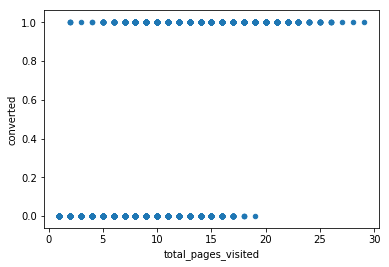

In [33]:
data[data[param]==1.0].plot.scatter(x="total_pages_visited", y="converted")

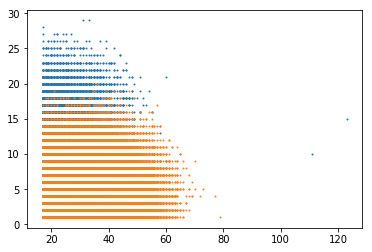

In [76]:
plt.figure()
plt.scatter(data[data["converted"]==1.]["age"],data[data["converted"]==1.]["total_pages_visited"], s=1)
plt.scatter(data[data["converted"]==0.]["age"],data[data["converted"]==0.]["total_pages_visited"], s=1)
plt.show()

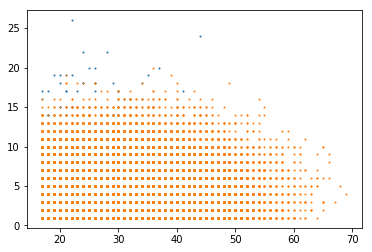

In [137]:
us = data[data["US"]==1.]
china = data[data["China"]==1.]
uk = data[data["UK"]==1.]
germany = data[data["Germany"]==1.]

plt.figure()
plt.scatter(china[china["converted"]==1.]["age"],china[china["converted"]==1.]["total_pages_visited"], s=1)
plt.scatter(china[china["converted"]==0.]["age"],china[china["converted"]==0.]["total_pages_visited"], s=1)
plt.show()

In [128]:
data[data["China"]==1.]["converted"].mean()

0.0013315579227696406

In [129]:
data[data["US"]==1.]["converted"].mean()

0.037800687285223365

In [86]:

data[data["converted"]==1.]["age"].mean()

26.546764705882353